In [1]:
from extract_alert_data import date_times,locations,all_locations_unique,location_alert_distribution
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [2]:
def fix_weekday(x):
    return (x.weekday()+1)%7+1

Text(0.5, 1.0, 'alert distribution over the week')

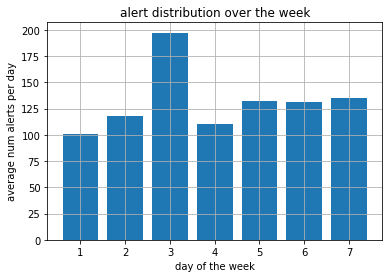

In [8]:
# -- all data --

min_date = min(date_times).date()
max_date = max(date_times).date()
day_count = (max_date - min_date).days + 1
weekdays = [fix_weekday(dt) for dt in (min_date + datetime.timedelta(n) for n in range(day_count))]

alert_weekdays = [fix_weekday(dt) for dt in date_times]
hist,_ = np.histogram(alert_weekdays,np.linspace(0.5,7.5,8,endpoint=True))
hist_num_weekdays_in_timespan,_ = np.histogram(weekdays,np.linspace(0.5,7.5,8,endpoint=True))
plt.bar(range(1,8),hist/hist_num_weekdays_in_timespan)
plt.grid()
plt.xlabel("day of the week")
plt.ylabel("average num alerts per day")
plt.title("alert distribution over the week")

Text(0.5, 1.0, 'alert distribution over time')

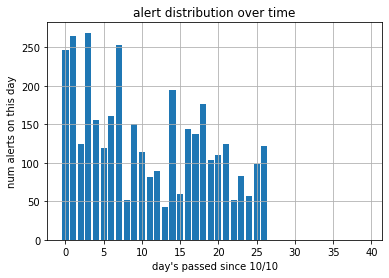

In [9]:
alert_month_days = [(dt - min(date_times)).days for dt in date_times ]
hist,_ = np.histogram(alert_month_days,np.arange(-0.5,40.5,1))
plt.bar(range(0,len(hist)),hist)
plt.grid()
plt.xlabel("day's passed since 10/10")
plt.ylabel("num alerts on this day")
plt.title("alert distribution over time")

1
2023-10-10 11:59:00 2023-10-23 21:02:00
2
2023-10-23 11:30:00 2023-11-05 22:02:00


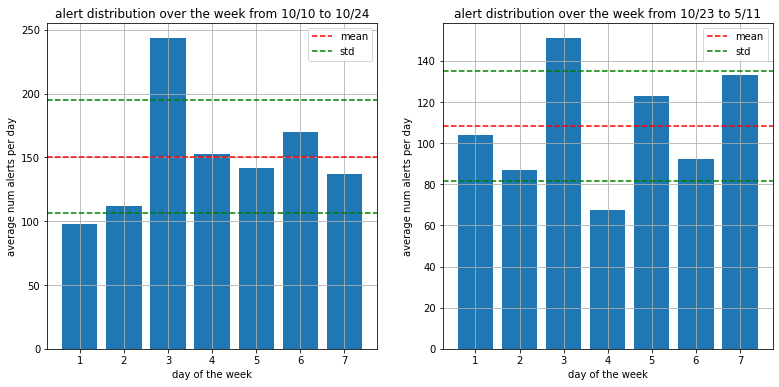

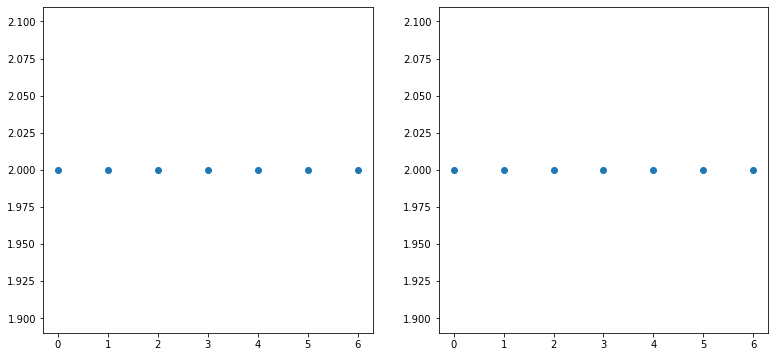

In [44]:
# -- split data into two halfs --
fig,axes = plt.subplots(1,2,figsize=(13,6))
fig,_axes = plt.subplots(1,2,figsize=(13,6))

# -- only first half --
plt.sca(axes[0])
min_date = min(date_times).date()
max_date = max(date_times).date()
day_count = (max_date - min_date).days + 1
day_count = day_count//2
max_date = min_date + datetime.timedelta(day_count)
date_times_rev = [dt for dt in date_times if min_date <= dt.date() <= max_date]
min_date = min(date_times_rev).date()
max_date = max(date_times_rev).date()
day_count = (max_date - min_date).days + 1
weekdays = [fix_weekday(dt) for dt in (min_date + datetime.timedelta(n) for n in range(day_count))]

alert_weekdays = [fix_weekday(dt) for dt in date_times_rev]
hist,_ = np.histogram(alert_weekdays,np.linspace(0.5,7.5,8,endpoint=True))
hist_num_weekdays_in_timespan,_ = np.histogram(weekdays,np.linspace(0.5,7.5,8,endpoint=True))
plt.bar(range(1,8),hist/hist_num_weekdays_in_timespan)
plt.grid()
plt.xlabel("day of the week")
plt.ylabel("average num alerts per day")
end_date_str = (min_date + datetime.timedelta(day_count)).isoformat()[5:].replace("-","/")
plt.title(f"alert distribution over the week from 10/10 to {end_date_str}")
plt.axline([3,np.mean(hist/hist_num_weekdays_in_timespan)],slope=0,color="r",linestyle="--", label="mean")
plt.axline([3,np.mean(hist/hist_num_weekdays_in_timespan) + np.std(hist/hist_num_weekdays_in_timespan)],slope=0,color="g",linestyle="--", label="std")
plt.axline([3,np.mean(hist/hist_num_weekdays_in_timespan) - np.std(hist/hist_num_weekdays_in_timespan)],slope=0,color="g",linestyle="--")
plt.legend()

plt.sca(_axes[0])
plt.plot(hist_num_weekdays_in_timespan,"o")

print("1")
print(min(date_times_rev),max(date_times_rev))


# -- only second half --
plt.sca(axes[1])
min_date = min(date_times).date()
max_date = max(date_times).date()
day_count = (max_date - min_date).days + 1
min_date = min_date + datetime.timedelta(day_count//2)
date_times_rev = [dt for dt in date_times if min_date <= dt.date() <= max_date]
min_date = min(date_times_rev).date()
max_date = max(date_times_rev).date()
day_count = (max_date - min_date).days + 1
weekdays = [fix_weekday(dt) for dt in (min_date + datetime.timedelta(n) for n in range(day_count))]

alert_weekdays = [fix_weekday(dt) for dt in date_times_rev]
hist,_ = np.histogram(alert_weekdays,np.linspace(0.5,7.5,8,endpoint=True))
hist_num_weekdays_in_timespan,_ = np.histogram(weekdays,np.linspace(0.5,7.5,8,endpoint=True))
plt.bar(range(1,8),hist/hist_num_weekdays_in_timespan)
plt.grid()
plt.xlabel("day of the week")
plt.ylabel("average num alerts per day")
start_date_str = min_date.isoformat()[5:].replace("-","/")
plt.title(f"alert distribution over the week from {start_date_str} to 5/11")
plt.axline([3,np.mean(hist/hist_num_weekdays_in_timespan)],slope=0,color="r",linestyle="--", label="mean")
plt.axline([3,np.mean(hist/hist_num_weekdays_in_timespan) + np.std(hist/hist_num_weekdays_in_timespan)],slope=0,color="g",linestyle="--", label="std")
plt.axline([3,np.mean(hist/hist_num_weekdays_in_timespan) - np.std(hist/hist_num_weekdays_in_timespan)],slope=0,color="g",linestyle="--")
plt.legend()

plt.sca(_axes[1])
_ = plt.plot(hist_num_weekdays_in_timespan,"o")

print("2")
print(min(date_times_rev),max(date_times_rev))

In [41]:
hist,_ = np.histogram(alert_weekdays,np.linspace(0.5,7.5,8,endpoint=True))